### Cat Vs Dog Prediction Using Transfer Learning (Mobilenet)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub # can pip install

In [2]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('image_data/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 198 images belonging to 2 classes.


In [3]:
training_set.class_indices

{'Cat': 0, 'Dog': 1}

In [4]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('image_data/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 100 images belonging to 2 classes.


In [5]:
# for plotting images (optional)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

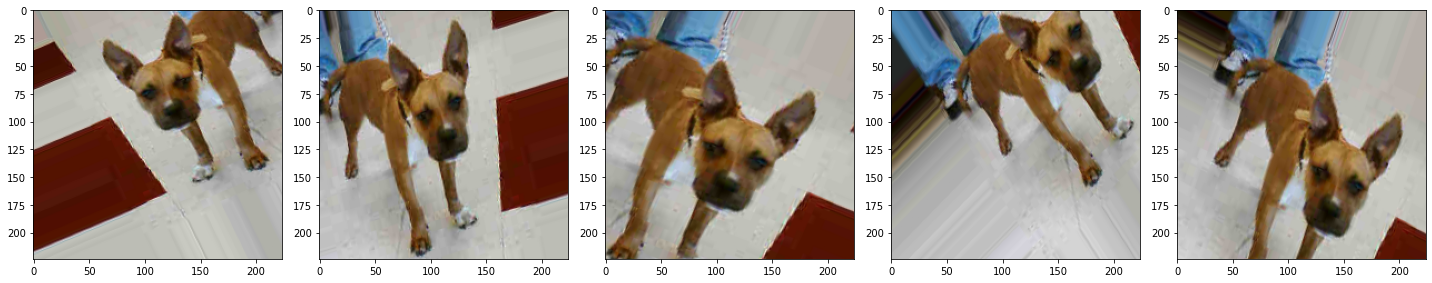

In [6]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

## Use Mobile Net

In [25]:
from tensorflow.keras.applications import MobileNet
from keras.layers import Dense, Input,TimeDistributed, Concatenate,Dense
from tensorflow.keras.applications import DenseNet121
from keras import Model,Sequential

In [20]:
inp = Input(shape=(224,224,3))

model1 = MobileNet()
model2 = DenseNet121()

In [ ]:
model1.trainable = False
model2.trainable = False

In [23]:
combined = Concatenate()([model1(inp), model2(inp)])
outputs = Dense(1, activation='sigmoid')(combined)

In [28]:
model = Model(inp, outputs)

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 mobilenet_1.00_224 (Functional  (None, 1000)        4253864     ['input_7[0][0]']                
 )                                                                                                
                                                                                                  
 densenet121 (Functional)       (None, 1000)         8062504     ['input_7[0][0]']                
                                                                                            

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit_generator(
    training_set,
    epochs=1,
    validation_data=test_set
    )

c:\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


7/7 [==============================] - 287s 33s/step - loss: 0.6753 - accuracy: 0.8182 - val_loss: 0.6639 - val_accuracy: 0.9200


### Load And Save Model

In [16]:
#save model
from tensorflow.keras.models import load_model
model.save('catvsdog.h5')

In [35]:
#load model
model = load_model(('catvsdog.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def model_predict(image_path,model):
    print("Predicted")
    image = load_img(image_path,target_size=(224,224))
    image = img_to_array(image)
    image = image/255
    image = np.expand_dims(image,axis=0)
    
    result = model.predict(image)
    print(result)
    
    if result[0]<=0.5:
        print("The image classified is cat")
    else:
        print("The image classified is dog")

In [33]:
path='5544.jpg'
model_predict(path,model)

Predicted
[[0.03329277]]
The image classified is cat
